# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

### Откройте файл с данными и изучите общую информацию.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('real_estate_data.csv', sep='\t')
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Описание данных
1. total_images — число фотографий квартиры в объявлении
2. last_price — цена на момент снятия с публикации
3. total_area — общая площадь квартиры в квадратных метрах (м²)
4. first_day_exposition — дата публикации
5. rooms — число комнат
6. ceiling_height — высота потолков (м)
7. floors_total — всего этажей в доме
8. living_area — жилая площадь в квадратных метрах (м²)
9. floor — этаж
10. is_apartment — апартаменты (булев тип)
11. studio — квартира-студия (булев тип)
12. open_plan — свободная планировка (булев тип)
13. kitchen_area — площадь кухни в квадратных метрах (м²)
14. balcony — число балконов
15. locality_name — название населённого пункта
16. airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
17. cityCenters_nearest — расстояние до центра города (м)
18. parks_around3000 — число парков в радиусе 3 км
19. parks_nearest — расстояние до ближайшего парка (м)
20. ponds_around3000 — число водоёмов в радиусе 3 км
21. ponds_nearest — расстояние до ближайшего водоёма (м)
22. days_exposition — сколько дней было размещено объявление (от публикации до снятия)


### Предобработка данных

In [3]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [4]:
data.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Заполним пропуски в столбцах и изменим форматв столбцах:**
1. 'last_price' пропусков нет, меняем только формат на целочисленное
2. 'first_day_exposition' пропусков нет, меняем только формат
3. 'balcony' заменим пропуски на 0 и переведем в целочисленный формат
4. 'parks_around3000' заменим пропуски на 0 и переведем в целочисленный формат
5. 'ponds_around3000' заменим пропуски на 0 и переведем в целочисленный формат
6. 'is_apartment' заменяем пропущенные значения на нет
7. 'rooms' заменим пропуски на 0 и переведем в целочисленный формат
8. 'floors_total' 86 пропусков, удалим их и переведем в целочисленный формат
9. 'locality_name' 49 пропусков, удалим их
10. 'ceiling_height' выбивающие значения от 20 до 35 поделим на 10 и заполним пропуски медианной
11. 'living_area' заменяем пустые значения жилой площади
12. 'kitchen_area' в студийных квартирах площадь ставим 0, остальное заполняем по аналогии со столбцом 'living_area'
13. 'days_exposition' заменяем пропуски в столбце на маркер 7777, т.к. пропуски занимают 13%, что является достаточным большим объемом для простого удаления этих строк и приводим к целочисленному типу

In [6]:
data.duplicated().sum()

0

In [7]:
data['last_price'].unique()

array([13000000.,  3350000.,  5196000., ...,  6151120., 21400000.,
       11475000.])

In [8]:
data['last_price'] = data['last_price'].astype(int)


In [9]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [10]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [11]:
data['balcony'] = data['balcony'].fillna(value=0).astype(int) #Заменим пропуски на 0 и переведем в целочисленный формат

In [12]:
data['parks_around3000'].unique()

array([ 1.,  0.,  2., nan,  3.])

In [13]:
#Заменим пропуски на 0 и переведем в целочисленный формат
data['parks_around3000'] = data['parks_around3000'].fillna(value=0).astype(int)

In [14]:
data['parks_around3000'].unique()

array([1, 0, 2, 3])

In [15]:
#Заменим пропуски на 0 и переведем в целочисленный формат
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0).astype(int)

In [16]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [17]:
data['is_apartment'] = data['is_apartment'].fillna(value=False) #Заменяем пропущенные значения на нет

In [18]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12],
      dtype=int64)

In [19]:
data['rooms'] = data['rooms'].fillna(0).astype(int) #Заменим пропуски на 0 и переведем в целочисленный формат

In [20]:
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [21]:
data.dropna(subset=['floors_total'], inplace=True)

In [22]:
data['floors_total'] = data['floors_total'].astype(int)

In [23]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [24]:
data.dropna(subset=['locality_name'], inplace=True)

In [25]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [26]:
data.loc[(data['ceiling_height'] >= 20) & (data['ceiling_height'] <= 35), 'ceiling_height'] = data['ceiling_height'] / 10

In [27]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
         3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,   3.34,
      

In [28]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
print(data['ceiling_height'].describe()) #Добавил строчку для вывода.

count    23565.000000
mean         2.702566
std          0.681051
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


In [29]:
living = data['living_area'].mean() / data['total_area'].mean()

In [30]:
data['living_area'].fillna(living * data['total_area'], inplace=True)

In [31]:
data.loc[data['studio'] == True, 'kitchen_area'] = 0

In [32]:
kitchen = data['kitchen_area'].mean() / data['total_area'].mean()

In [33]:
data['kitchen_area'].fillna(kitchen * data['total_area'], inplace=True)

In [34]:
data['days_exposition'].fillna(7777, inplace=True)
data['days_exposition'] = data['days_exposition'].astype(int)

In [35]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition             0
dtype: int64

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int32         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int32         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int32         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

In [37]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})
data['airports_nearest'].fillna(-1, inplace=True)
data['city_centers_nearest'].fillna(-1, inplace=True)
data['parks_nearest'].fillna(-1, inplace=True)
data['ponds_nearest'].fillna(-1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int32         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int32         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int32         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

In [38]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.702566,10.675875,34.592277,5.878124,10.463589,0.593677,22046.367282,10879.297178,0.468831,166.510757,0.589900,198.121579,1202.924125
std,5.681156,1.091093e+07,35.657060,1.078591,0.681051,6.594823,22.373679,4.871485,6.071466,0.960660,16462.449755,9639.609656,0.748403,306.661592,0.883966,305.597148,2600.380191
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,10143.000000,2186.000000,0.000000,-1.000000,0.000000,-1.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,21854.000000,11246.000000,0.000000,-1.000000,0.000000,-1.000000,124.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,42.100000,8.000000,12.000000,1.000000,34324.000000,15237.000000,1.000000,301.000000,1.000000,389.000000,390.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,7777.000000


Вывод:
1. Поменяли формат в таких столбцах где это требовалось.
2. Высоту потолков привели к реалистичным.
3. Пропущенные значения заполнены.
4. Удалены пропуски где это было возможно
5. Переименовали столбец cityCenters_nearest
6. Количество объектов уменьшено до 23565

Пропуски и некоректные данные могли появиться из-за ошибок или опечаток самих пользователей. Возможно нужно доработать способ подачи объявления. Например: сделать выбор в количестве комнат или балконов. А так же сделать многие поля обязательными для заполнения. Еще можно уделить внимание аномальным данным на момент заполнения, уточняя у клиента "Уверенны ли Вы в высоте потолков".


### Посчитайте и добавьте в таблицу новые столбцы

 Добавляем столбец со стоимостью квадратного метра (sq_m_price)

In [39]:
data['sq_m_price'] = data['last_price'] / data['total_area']
data['sq_m_price'] = data['sq_m_price'].astype(int) #приводим его в целочисленный тип

Добавляем столбцы дня недели, месяца и года

In [40]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

Добавляем столбец c типом этажа квартиры (значения — «первый», «последний», «другой»),для этого создадим функцию

In [41]:
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_group, axis=1)

Добавляем столбец с отношением жилой площади к общей (area_ratio)

In [42]:
data['area_ratio'] = data['living_area'] / data['total_area']*100
data['area_ratio'] = data['area_ratio'].fillna(value=0).astype(int)

Добавляем столбец с отношением площади кухни к общей (kitchen_ratio)

In [43]:
data['kitchen_ratio'] = data['kitchen_area']/ data['total_area']*100
data['kitchen_ratio'] = data['kitchen_ratio'].fillna(value=0).astype(int)

In [44]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sq_m_price,weekday,month,year,floor_type,area_ratio,kitchen_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,2,755.0,7777,120370,3,3,2019,другой,47,23
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,0,-1.0,81,82920,1,12,2018,первый,46,27
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,2,574.0,558,92785,3,8,2015,другой,61,14
3,0,64900000,159.0,2015-07-24,3,2.65,14,90.816648,9,False,...,3,234.0,424,408176,4,7,2015,другой,57,17
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,1,48.0,121,100000,1,6,2018,другой,32,41


In [45]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_m_price,weekday,month,year,area_ratio,kitchen_ratio
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,...,23565.000000,23565.000000,23565.000000,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.702566,10.675875,34.592277,5.878124,10.463589,0.593677,...,166.510757,0.589900,198.121579,1202.924125,9.940539e+04,2.567367,6.401570,2017.371016,56.098748,18.034882
std,5.681156,1.091093e+07,35.657060,1.078591,0.681051,6.594823,22.373679,4.871485,6.071466,0.960660,...,306.661592,0.883966,305.597148,2600.380191,5.038944e+04,1.788279,3.492948,1.037393,10.108382,7.105903
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,-1.000000,0.000000,-1.000000,1.000000,1.110000e+02,0.000000,1.000000,2014.000000,2.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,...,-1.000000,0.000000,-1.000000,45.000000,7.656600e+04,1.000000,3.000000,2017.000000,50.000000,13.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,-1.000000,0.000000,-1.000000,124.000000,9.500000e+04,3.000000,6.000000,2017.000000,57.000000,17.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,42.100000,8.000000,12.000000,1.000000,...,301.000000,1.000000,389.000000,390.000000,1.142130e+05,4.000000,10.000000,2018.000000,63.000000,22.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3190.000000,3.000000,1344.000000,7777.000000,1.907500e+06,6.000000,12.000000,2019.000000,100.000000,78.000000


### Проведите исследовательский анализ данных

 4.1. Смотрим основные параметры.

4.1.1 Общая площадь.

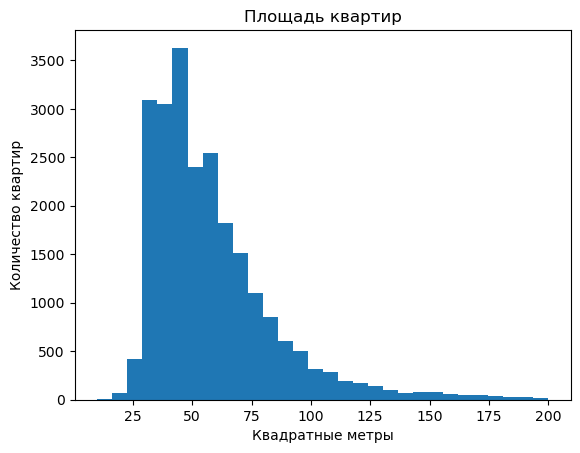

Наибольшие по площади варианты:
19540    900.0
12859    631.2
3117     631.0
15651    618.0
5358     590.0
4237     517.0
8018     507.0
15016    500.0
5893     500.0
12401    495.0
Name: total_area, dtype: float64


In [46]:
plt.hist(data['total_area'], bins=30, range=(10,200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади варианты:')
print(data['total_area'].sort_values(ascending=False).head(10))

4.1.2. Жилая площадь.

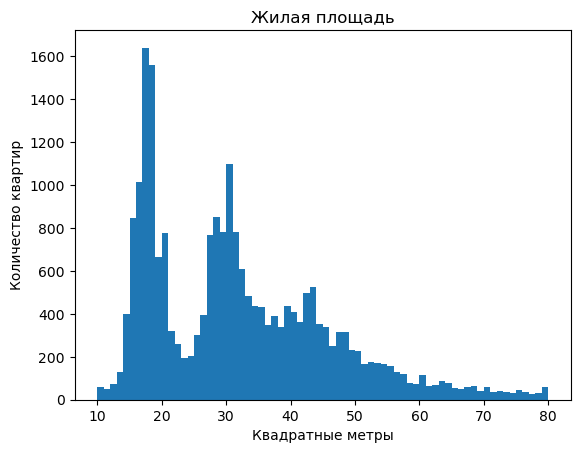

Наибольшие по жилой площади варианты:
19540    409.700000
5358     409.000000
3117     360.410721
12401    347.500000
4237     332.000000
12859    322.300000
660      312.500000
8018     301.500000
14088    300.000000
5893     285.586942
Name: living_area, dtype: float64


In [47]:
plt.hist(data['living_area'], bins=70, range=(10,80))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по жилой площади варианты:')
print(data['living_area'].sort_values(ascending=False).head(10))

4.1.3. Площадь кухни.

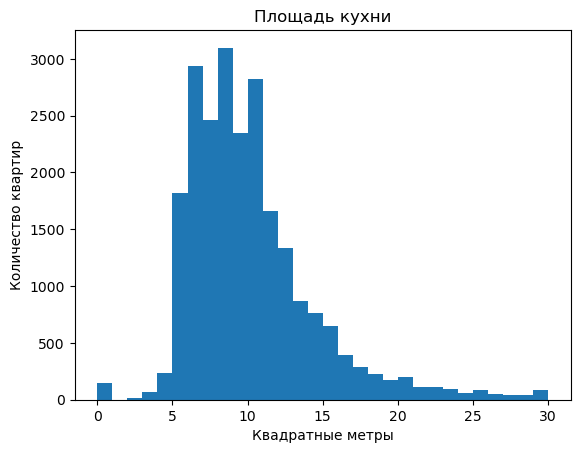

Наибольшие по площади кухни варианты:
19540    112.000000
20215    107.000000
2489     100.700000
5358     100.000000
16239     93.200000
16797     93.000000
10867     87.200000
15016     86.942556
9826      85.916634
492       77.000000
Name: kitchen_area, dtype: float64


In [48]:
plt.hist(data['kitchen_area'], bins=30, range=(0,30))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади кухни варианты:')
print(data['kitchen_area'].sort_values(ascending=False).head(10))

4.1.4 Цена объекта.

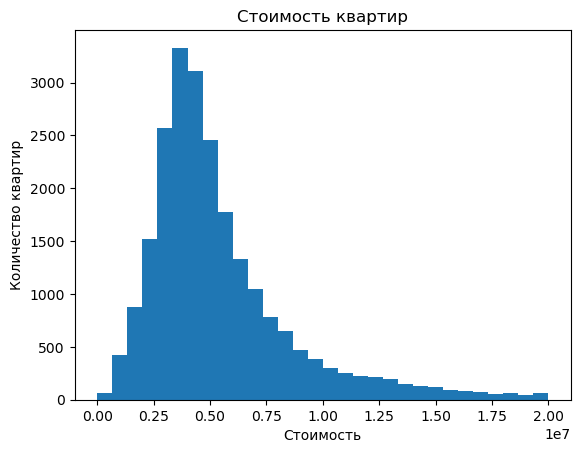

Наибольшие по цене варианты:
12971    763000000
19540    420000000
14706    401300000
1436     330000000
15651    300000000
22831    289238400
16461    245000000
13749    240000000
5893     230000000
8900     190870000
Name: last_price, dtype: int32


In [49]:
plt.hist(data['last_price'], bins=30, range=(0,20000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по цене варианты:')
print(data['last_price'].sort_values(ascending=False).head(10))

4.1.5. Количество комнат

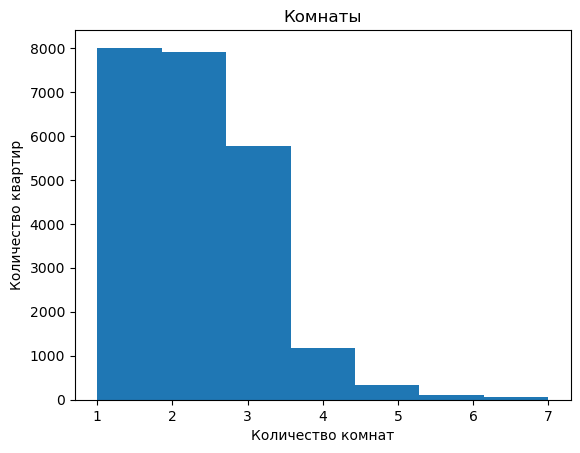

Наибольшие по числу комнат варианты:
14498    19
18848    16
5358     15
20829    14
866      14
19540    12
648      11
9688     11
18891    10
18119    10
Name: rooms, dtype: int32


In [50]:
plt.hist(data['rooms'], bins=7, range=(1,7))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по числу комнат варианты:')
print(data['rooms'].sort_values(ascending=False).head(10))

4.1.6 Высота потолков

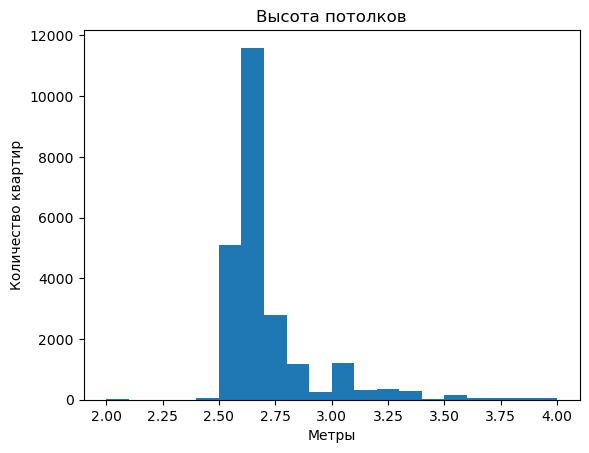

Наибольшие по высоте потолков варианты:
22869    100.0
15061     14.0
22309     10.3
5863       8.3
3474       8.0
15743      8.0
17442      8.0
20264      6.0
21227      5.8
1388       5.6
Name: ceiling_height, dtype: float64


In [51]:
plt.hist(data['ceiling_height'], bins=20, range=(2,4))
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по высоте потолков варианты:')
print(data['ceiling_height'].sort_values(ascending=False).head(10))

4.1.7. Этаж квартиры.

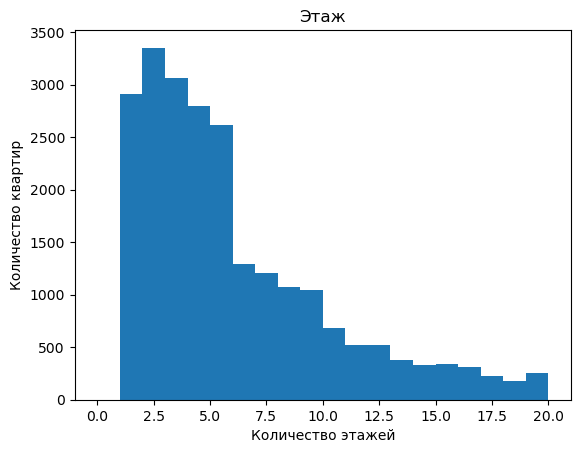

Наибольшие по числу этаэей варианты:
14498    19
18848    16
5358     15
20829    14
866      14
19540    12
648      11
9688     11
18891    10
18119    10
Name: rooms, dtype: int32


In [52]:
plt.hist(data['floor'], bins=20, range=(0,20))
plt.title('Этаж')
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по числу этаэей варианты:')
print(data['rooms'].sort_values(ascending=False).head(10))

4.1.8. Цена за квадратный метр.

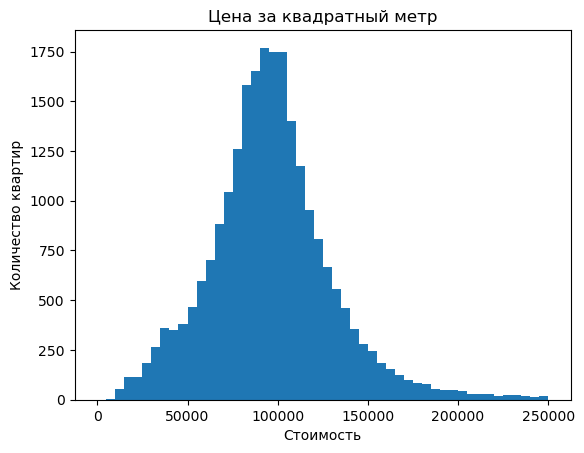

Наибольшие по цене за квадрат варианты:
12971    1907500
1436     1736842
22831    1542604
14706    1000748
4996      995983
16461     857542
4859      848484
17172     848484
16647     841379
17912     813253
Name: sq_m_price, dtype: int32


In [53]:
plt.hist(data['sq_m_price'], bins=50, range=(0,250000))
plt.title('Цена за квадратный метр')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по цене за квадрат варианты:')
print(data['sq_m_price'].sort_values(ascending=False).head(10))

4.1.9. Тип этажа квартиры («первый», «последний», «другой»).

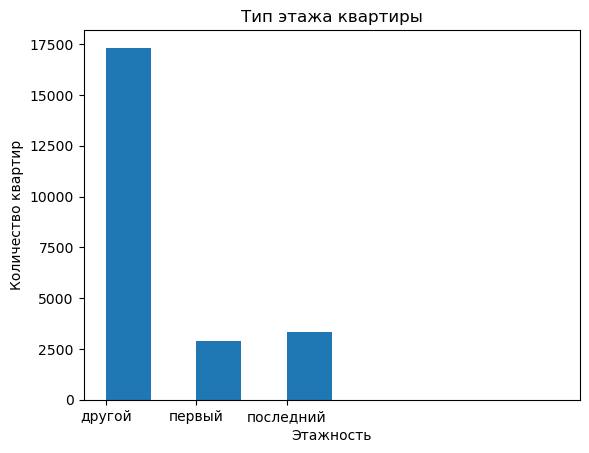

In [54]:
plt.hist(data['floor_type'], bins=10, range=(0,5))
plt.title('Тип этажа квартиры')
plt.xlabel('Этажность')
plt.ylabel('Количество квартир')
plt.show()

4.1.10. Общее количество этажей в доме.

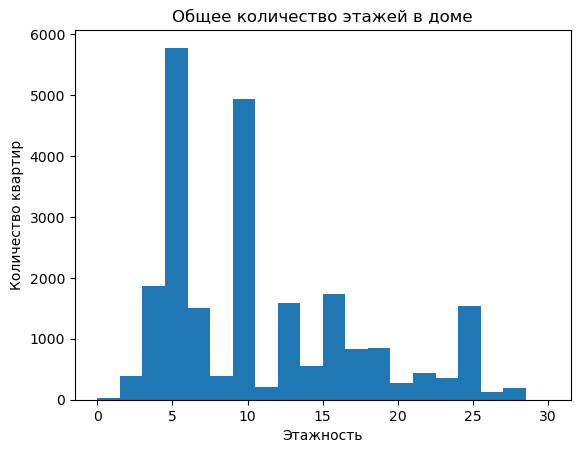

In [55]:

plt.hist(data['floors_total'], bins=20, range=(0,30))
plt.title('Общее количество этажей в доме')
plt.xlabel('Этажность')
plt.ylabel('Количество квартир')
plt.show()
#print(data['floors_total'].sort_values(ascending=False).head(10))

4.1.11. Расстояние до центра города в метрах.

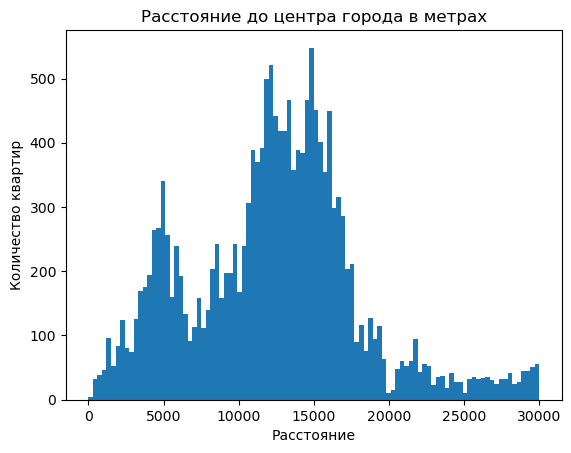

2253     60
16731    52
16934    37
5807     36
11079    36
397      36
13975    35
2966     35
9186     35
1917     35
Name: floors_total, dtype: int32


In [56]:
plt.hist(data['city_centers_nearest'], bins=100, range=(0,30000))
plt.title('Расстояние до центра города в метрах')
plt.xlabel('Расстояние')
plt.ylabel('Количество квартир')
plt.show()
print(data['floors_total'].sort_values(ascending=False).head(10))

4.1.12. Расстояние до ближайшего аэропорта.

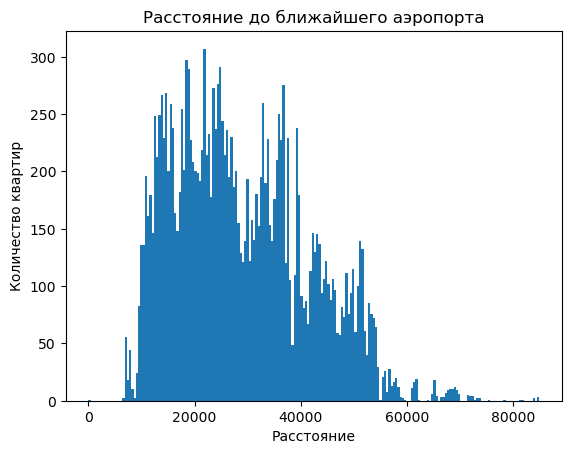

9640     84869.0
5340     84853.0
577      84665.0
20746    84006.0
5218     83758.0
18884    81607.0
2974     81355.0
4441     78527.0
939      75646.0
376      73827.0
Name: airports_nearest, dtype: float64


In [57]:
#print(data.query('airports_nearest != -1')['airports_nearest'].describe())
plt.hist(data['airports_nearest'], bins=200, range=(0,85000))
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Расстояние')
plt.ylabel('Количество квартир')
plt.show()
print(data['airports_nearest'].sort_values(ascending=False).head(10))

4.1.13. Расстояние до ближайшего парка.

count    8030.000000
mean      490.580448
std       341.572956
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


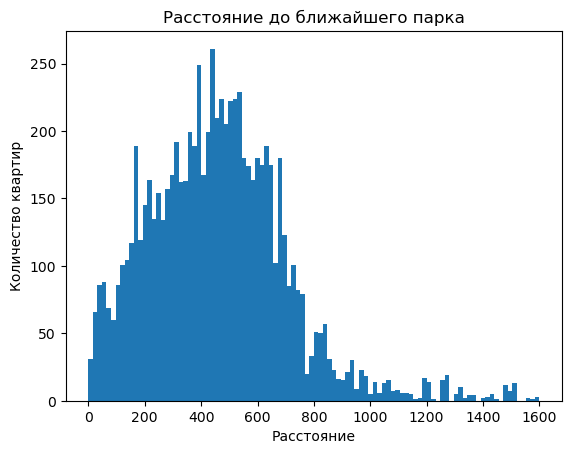

10959    3190.0
19430    3190.0
1590     3064.0
19208    3013.0
23080    2984.0
2659     2905.0
1860     2888.0
7855     2880.0
3865     2847.0
22003    2768.0
Name: parks_nearest, dtype: float64


In [58]:
print(data.query('parks_nearest != -1')['parks_nearest'].describe())
plt.hist(data['parks_nearest'], bins=100, range=(0,1600))
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние')
plt.ylabel('Количество квартир')
plt.show()
print(data['parks_nearest'].sort_values(ascending=False).head(10))

4.1.14. День публикации объявления.

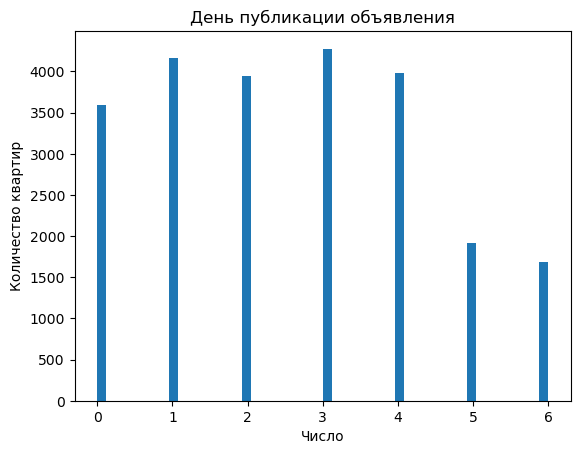

In [59]:
#print(data['weekday'].describe())
plt.hist(data['weekday'], bins=50, range=(0,6))
plt.title('День публикации объявления')
plt.xlabel('Число')
plt.ylabel('Количество квартир')
plt.show()
#print(data['weekday'].sort_values(ascending=False).head(10))

4.1.15. Месяц публикации объявления.

count    23565.000000
mean         6.401570
std          3.492948
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64


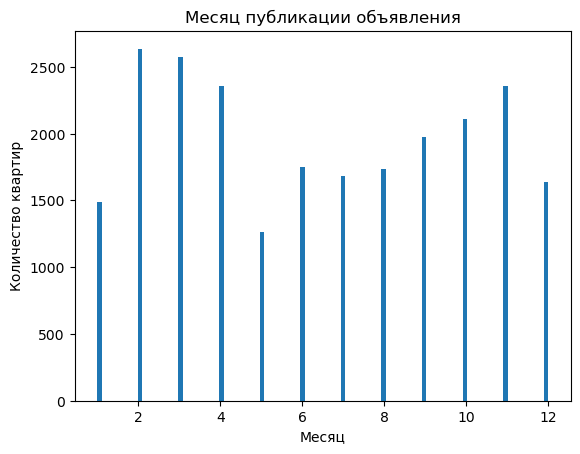

In [60]:
print(data['month'].describe())
plt.hist(data['month'], bins=100, range=(1,12))
plt.title('Месяц публикации объявления')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')
plt.show()
#print(data['weekday'].sort_values(ascending=False).head(10))


**Вывод**
1. Площадь.
Большинство квартир - менее 100 квадратных метров, больше площадь практически не встречается.
2. Жилая площадь.
Самые распространённые варианты с жилой площадью от 10 до 50 метров. После 80 метров встречаются единичные случаи. Два пика графика вызваны, вероятно, тем, что это жилые площади для 1-комнатной, затем для 2-комнатной и после этого для 3-комнатной квартиры.
3. Площадь кухни.
Самые распространённые кухни - от 5 до 15 метров. Больше 20 метров кухни встречаются редко. Больше 30 - единичные случаи.
4. Стоимость.
В основном стоимость квартир - в районе 5 миллионов. Больше 20 миллионов вариантов мало и они выглядят очень странно и некоторые - на порядок дороже.
5. Комнаты.
В основном квартиры состоят из 1, 2 и 3 комнат. Есть небольшая доля 4-комнатных квартир. Варианты, где больше 7 комнат выглядят странно.Скорее всего, это отдельный дом.
6. Высота потолков.
Большинство вариантов имеют высоту потолков от 2,5 до 3 метров. Больше 4 метров высота потолков выглядит странно.
7. Этаж квартиры.
Чаще всего продают с 1 по 6 этаж. Квартиры на более высоких этажах продаются реже, это может быть обусловленно тем, что Спб стал застраиваться многоэтажками относительно недавно.
8. Цена за квадратный метр.
Имеет нормальное распределение с пиком в районе 100,000. Варианты дороже 250,000 являются единичными.

**Вывод:**
1. Чаще всего квартиры продаются в 6 и 12 этажных домах.
2. Самое большое число квартир продаются в 10-20 км. от центра города.
3. Самое большое число квартир продаются в 15-35 км. от центра города.
4. Расстояние до ближайшего парка в среднем 250-600 метров.
5. Чаще всего объявления выкладывались по будням.
7. Количество объявлений выкладываемых летом снижается.

4.2. Смотрим время продажи квартир.

Время продажи (медиана): 95 

Время продажи (среднее): 181 



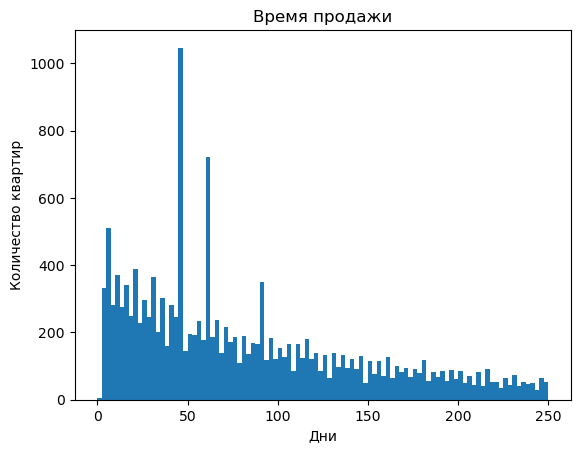

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [61]:
print('Время продажи (медиана):', round(data.query('days_exposition != 7777')['days_exposition'].median()),'\n')
print('Время продажи (среднее):', round(data.query('days_exposition != 7777')['days_exposition'].mean()),'\n')
plt.hist(data.query('days_exposition != 7777')['days_exposition'], bins=100, range=(0,250))
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()
data.query('days_exposition != 7777')['days_exposition'].describe()

**Вывод:**
Медианное время продажи - 95 дня. Среднее время продажи - 181 день.
В основном квартиры продаются за срок в 110 дней. Есть большое число квартир, проданных всего за несколько дней после публикации, это может быть связанно как с низкой ценой, так и популярностью района. А также есть варианты, которые продавались несколько десятков месяцев.

Быстрой продажей можно назвать срок в 45 дня и меньше. Долгая продажа - 231 дней (7,5 месяцев) и дольше.

**Работа с редкими и выбивающимися значениями**

1. Функция для подсчёта границ с учетом 1.5 размаха.
2. Столбцы с выбросами.
3. 'rooms' возвращаем целочисленный формат.
4. Смотрим, что получилось.

In [62]:
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [63]:
def quartile_range(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq

In [64]:
list_features = ['total_area', 'kitchen_area', 'living_area', 'days_exposition', 'ceiling_height', 'rooms']
for col in list_features:
    data[col] = quartile_range(data, col)

In [65]:
data['rooms'] = data['rooms'].fillna(0).astype(int)

In [66]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_m_price,weekday,month,year,area_ratio,kitchen_ratio
count,23565.000000,2.356500e+04,22326.000000,23565.000000,20618.000000,23565.000000,22682.000000,23565.000000,22254.000000,23565.000000,...,23565.000000,23565.000000,23565.000000,19996.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000
mean,9.878421,6.540058e+06,54.319704,2.013495,2.631075,10.675875,31.526984,5.878124,9.382382,0.593677,...,166.510757,0.589900,198.121579,162.414783,9.940539e+04,2.567367,6.401570,2017.371016,56.098748,18.034882
std,5.681156,1.091093e+07,19.331030,0.986750,0.081491,6.594823,13.752739,4.871485,3.245190,0.960660,...,306.661592,0.883966,305.597148,177.715098,5.038944e+04,1.788279,3.492948,1.037393,10.108382,7.105903
min,0.000000,1.219000e+04,12.000000,0.000000,2.460000,1.000000,2.000000,1.000000,0.000000,0.000000,...,-1.000000,0.000000,-1.000000,1.000000,1.110000e+02,0.000000,1.000000,2014.000000,2.000000,0.000000
25%,6.000000,3.400000e+06,39.400000,1.000000,2.600000,5.000000,18.700000,2.000000,7.000000,0.000000,...,-1.000000,0.000000,-1.000000,44.000000,7.656600e+04,1.000000,3.000000,2017.000000,50.000000,13.000000
50%,9.000000,4.646000e+06,50.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,-1.000000,0.000000,-1.000000,92.000000,9.500000e+04,3.000000,6.000000,2017.000000,57.000000,17.000000
75%,14.000000,6.790000e+06,65.500000,3.000000,2.650000,16.000000,40.600000,8.000000,11.000000,1.000000,...,301.000000,1.000000,389.000000,217.000000,1.142130e+05,4.000000,10.000000,2018.000000,63.000000,22.000000
max,50.000000,7.630000e+08,114.200000,5.000000,2.850000,60.000000,76.700000,33.000000,19.475133,5.000000,...,3190.000000,3.000000,1344.000000,907.000000,1.907500e+06,6.000000,12.000000,2019.000000,100.000000,78.000000


**Работаем с ценой ('last_price')**

In [67]:
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

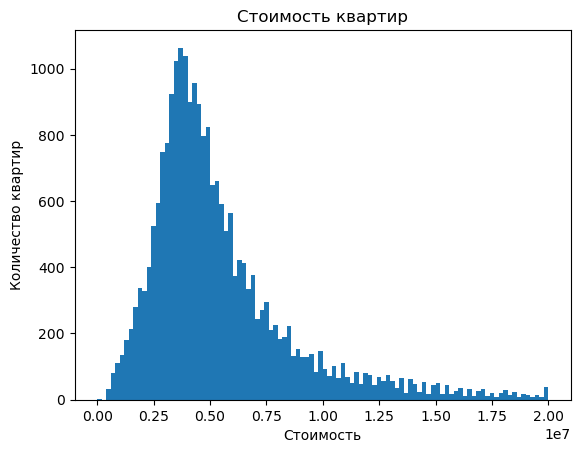

Наибольшие по цене варианты:
12971    763000000
19540    420000000
14706    401300000
1436     330000000
15651    300000000
22831    289238400
16461    245000000
13749    240000000
5893     230000000
8900     190870000
Name: last_price, dtype: int32


In [68]:
plt.hist(data['last_price'], bins=100, range=(0,20000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по цене варианты:')
print(data['last_price'].sort_values(ascending=False).head(10))

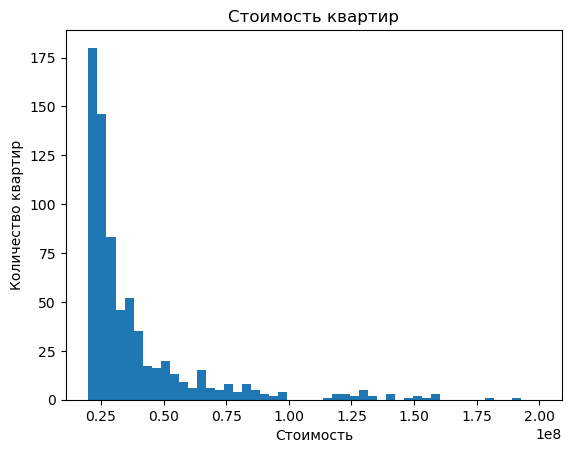

In [69]:
plt.hist(data['last_price'], bins=50, range=(20000000,200000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()

In [70]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sq_m_price,weekday,month,year,floor_type,area_ratio,kitchen_ratio
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00000,8,False,...,2,755.0,NaN,120370,3,3,2019,другой,47,23
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60000,1,False,...,0,-1.0,81.0,82920,1,12,2018,первый,46,27
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30000,4,False,...,2,574.0,558.0,92785,3,8,2015,другой,61,14
3,0,64900000,NaN,2015-07-24,3,2.65,14,NaN,9,False,...,3,234.0,424.0,408176,4,7,2015,другой,57,17
4,2,10000000,100.00,2018-06-19,2,NaN,14,32.00000,13,False,...,1,48.0,121.0,100000,1,6,2018,другой,32,41
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40000,5,False,...,0,-1.0,55.0,95065,0,9,2018,другой,47,29
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60000,6,False,...,0,-1.0,155.0,99195,3,11,2017,другой,28,38
7,5,7915000,71.60,2019-04-18,2,2.65,24,40.89605,22,False,...,0,-1.0,NaN,110544,3,4,2019,другой,57,26
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43000,26,False,...,0,-1.0,189.0,87454,2,5,2018,другой,46,26
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60000,7,False,...,0,-1.0,289.0,88524,6,2,2017,другой,71,10


In [71]:
data.query('last_price<100000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sq_m_price,weekday,month,year,floor_type,area_ratio,kitchen_ratio
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,0,-1.0,8.0,111,2,3,2019,последний,29,37


Избавимся от первой точки, т.к. по параметрам видно, что это ошибочная записть.

In [72]:
data.query('100000<last_price<=500000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sq_m_price,weekday,month,year,floor_type,area_ratio,kitchen_ratio
2097,9,500000,30.7,2019-04-30,1,2.65,2,15.100000,2,False,...,0,-1.0,NaN,16286,1,4,2019,последний,49,24
4405,9,500000,52.0,2018-08-02,2,2.70,2,31.000000,1,False,...,0,-1.0,110.0,9615,3,8,2018,первый,59,15
5698,7,450000,42.0,2017-07-31,2,2.65,1,23.000000,1,False,...,0,-1.0,233.0,10714,0,7,2017,первый,54,13
6859,6,490000,40.0,2017-12-11,1,2.65,5,22.846955,3,False,...,0,-1.0,43.0,12250,0,12,2017,другой,57,17
9581,7,450000,43.4,2018-08-31,2,2.65,5,30.300000,3,False,...,0,-1.0,96.0,10368,4,8,2018,другой,69,12
10782,3,490000,29.1,2016-05-05,1,2.50,5,17.000000,5,False,...,0,-1.0,719.0,16838,3,5,2016,последний,58,18
14295,4,500000,34.0,2016-02-09,1,2.65,5,17.000000,4,False,...,0,-1.0,724.0,14705,1,2,2016,другой,50,23
14904,3,500000,38.0,2018-02-08,1,2.65,3,21.704608,3,False,...,0,-1.0,44.0,13157,3,2,2018,последний,57,17
14911,5,430000,54.0,2018-06-26,2,2.65,3,30.843390,3,False,...,0,-1.0,44.0,7962,1,6,2018,последний,57,17
16032,8,480000,32.0,2019-01-06,1,2.65,2,16.000000,1,False,...,0,-1.0,83.0,15000,6,1,2019,первый,50,17


Посмотрим в каких городах присутствует такая цена за квартиру.

In [73]:
data.query('100000<last_price<=500000')['locality_name']

2097                    деревня Чудской Бор
4405                                 Сланцы
5698             городской посёлок Будогощь
6859                     деревня Старополье
9581                     деревня Старополье
10782                                Сланцы
14295    поселок городского типа Никольский
14904                           деревня Бор
14911                 посёлок станции Свирь
16032                                Сланцы
16219                  деревня Вахнова Кара
16274                    деревня Старополье
17456                                Сланцы
17676                     деревня Ям-Тесово
18867                      деревня Выскатка
21912                     поселок Совхозный
23484                                Сланцы
Name: locality_name, dtype: object

In [74]:
data.query('last_price>40000000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sq_m_price,weekday,month,year,floor_type,area_ratio,kitchen_ratio
3,0,64900000,NaN,2015-07-24,3,2.65,14,NaN,9,False,...,3,234.0,424.0,408176,4,7,2015,другой,57,17
51,7,45000000,NaN,2017-10-17,3,NaN,8,38.0,4,False,...,3,99.0,541.0,279503,1,10,2017,другой,23,31
155,8,96000000,NaN,2017-07-07,4,NaN,3,NaN,3,False,...,3,366.0,62.0,302839,4,7,2017,последний,57,17
411,1,40662000,NaN,2014-12-09,3,2.65,8,NaN,3,False,...,3,100.0,594.0,269284,1,12,2014,другой,56,15
464,15,66571000,NaN,2015-06-11,0,NaN,8,NaN,7,False,...,1,616.0,578.0,237499,3,6,2015,другой,56,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22709,20,59000000,NaN,2016-12-21,4,NaN,12,NaN,8,False,...,3,234.0,635.0,462745,2,12,2016,другой,66,10
22804,4,81960000,NaN,2017-09-29,4,NaN,9,NaN,3,False,...,1,227.0,169.0,399804,4,9,2017,другой,52,4
22831,18,289238400,NaN,2019-03-19,2,NaN,6,63.7,6,False,...,3,188.0,NaN,1542604,1,3,2019,последний,33,16
22907,9,65000000,NaN,2016-06-02,4,2.65,5,NaN,2,False,...,3,269.0,NaN,285087,3,6,2016,другой,87,17


Данные реальные. Устанавливаем нижнюю границу цены более 100000 р.

Расмотрим теперь верхнюю границу.

На гистограмме видно, что нормальная цена за квартиру варируются в пределах 0 до 13 млн.

Убираем с выборки все квартиры дороже 40 млн

In [75]:
data = data.query('last_price> 10000 and last_price<=40000000')

In [76]:
data['last_price'].describe()

count    2.338400e+04
mean     5.908920e+06
std      4.616333e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      4.000000e+07
Name: last_price, dtype: float64

**Вывод:**
В датафрейме отброшены значения на основе 1.5 размаха.

Цены на квартиры остались от 100000 до 40 000000.

4.3. Факторы, влияющие на стоимость квартиры.

4.3.1. Зависимость цены от площади

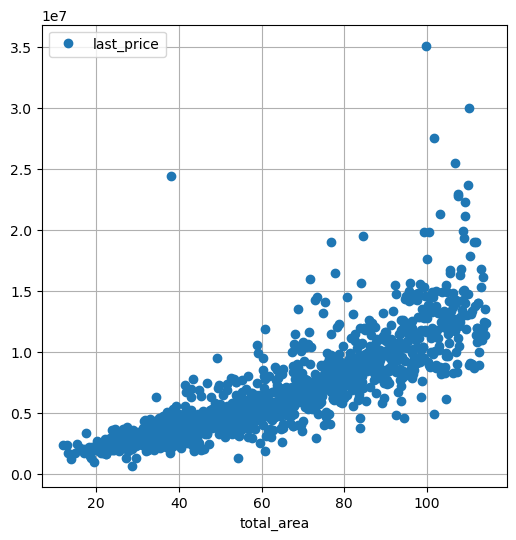

Корреляция цены и площади:
            last_price  total_area
last_price    1.000000    0.860919
total_area    0.860919    1.000000


In [77]:
data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(6, 6))
plt.show()
print('Корреляция цены и площади:')
print(data.pivot_table(index='floor', values=['total_area', 'last_price']).corr())

4.3.2. Зависимость цены от жилой площади.

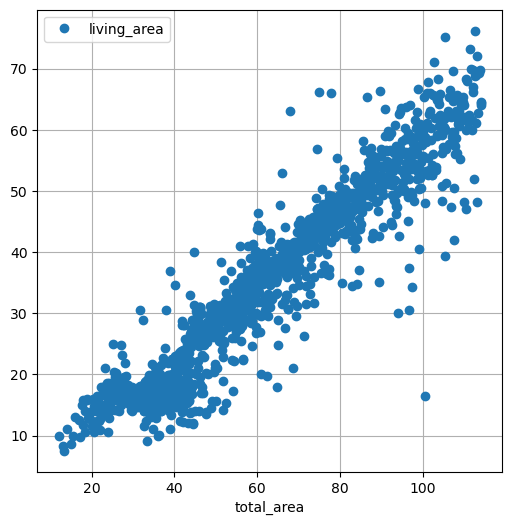

Корреляция цены и жилой площади:
             living_area  total_area
living_area     1.000000    0.917862
total_area      0.917862    1.000000


In [78]:
data.pivot_table(index='total_area', values='living_area').plot(grid=True, style='o', figsize=(6, 6))
plt.show()
print('Корреляция цены и жилой площади:')
print(data.pivot_table(index='floor', values=['total_area', 'living_area']).corr())

4.3.3. Зависимость цены от площади кухни.

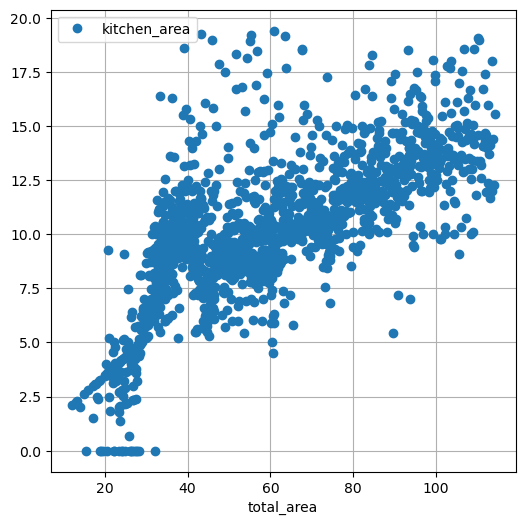

Корреляция цены и площади кухни:
              kitchen_area  total_area
kitchen_area      1.000000    0.281346
total_area        0.281346    1.000000


In [79]:
data.pivot_table(index='total_area', values='kitchen_area').plot(grid=True, style='o', figsize=(6, 6))
plt.show()
print('Корреляция цены и площади кухни:')
print(data.pivot_table(index='floor', values=['total_area', 'kitchen_area']).corr())

4.3.4. Зависимость цены от количества комнат.

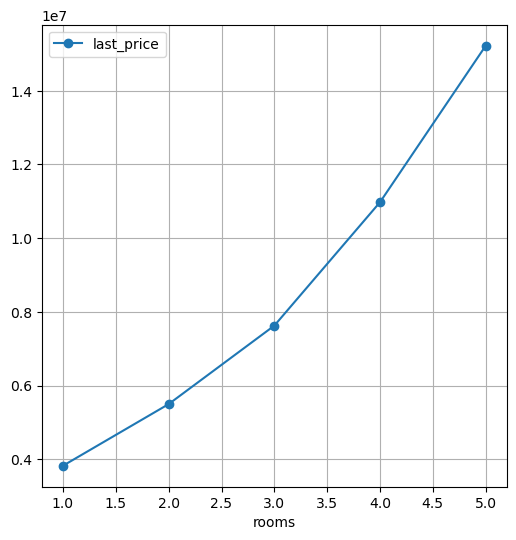

Корреляция цены и числа комнат:
            last_price     rooms
last_price    1.000000  0.564699
rooms         0.564699  1.000000


In [80]:
data.query('rooms > 0').pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(6, 6))
plt.show()
print('Корреляция цены и числа комнат:')
print(data.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'last_price']).corr())

4.3.5. Зависимость цены от типа этажа.

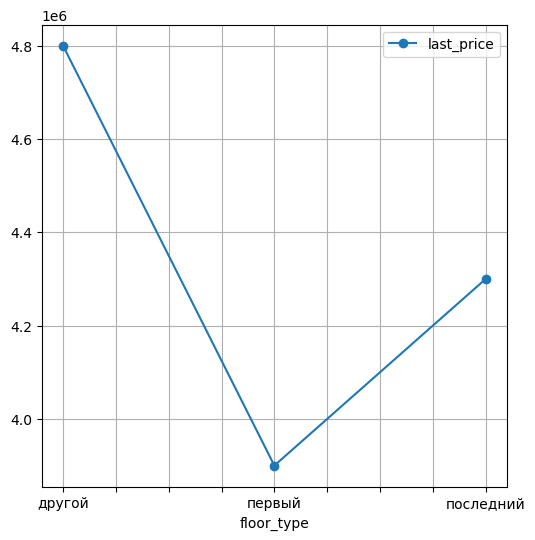

In [81]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(6, 6))
plt.show()

4.3.6. Зависимость от дня размещения

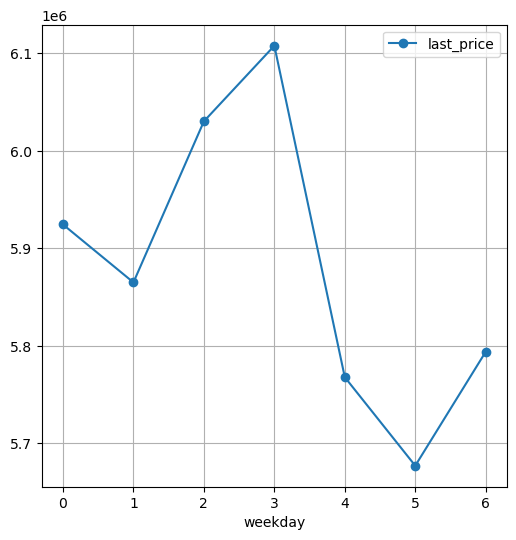

In [82]:
data.pivot_table(index='weekday', values='last_price').plot(grid=True, style='o-', figsize=(6, 6))
plt.show()


4.3.7. Зависимость от месяца размещения.

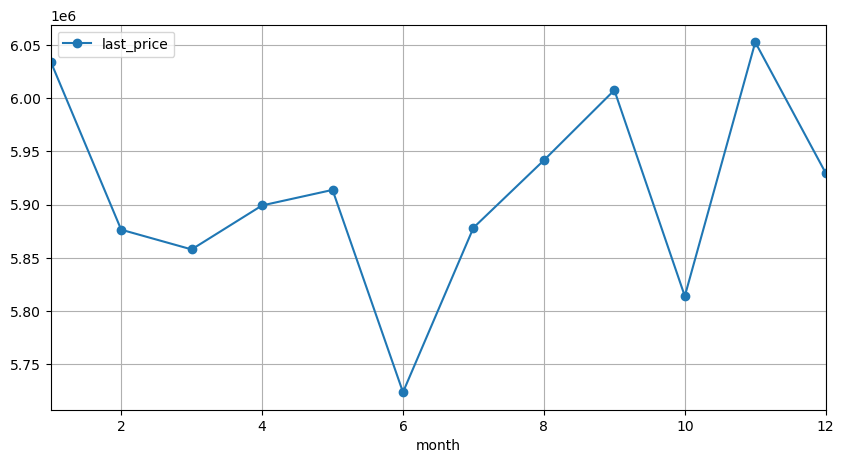

In [83]:
data.pivot_table(index='month', values='last_price').plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
plt.show()

4.3.8. Зависимость от года размещения.

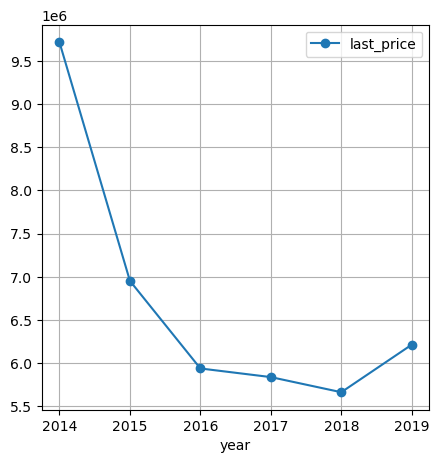

In [84]:
data.pivot_table(index='year', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()

**Вывод:**
1. Цена полностью зависит от площади квартиры. Самая большая зависимость цены от жилой площади.
2. Цена также влияет на площадь кухни, квартиры с просторной кухней стоят дороже.
3. Чем больше комнат, тем цена дороже. Зависимость там ниже, это может быть обусловлено тем, что квартиры с меньшей площадью, но большим количеством квартир, стоят дешевле, чем квартиры с большей площадью.
4. Самые дешевые квартиры на 1 этаже.
5. Самые дорогие квартиры выставлялись во вторник, самые дешевые в субботу и воскресенье. Это может быть обусловлено тем, кто именно выставлял квартиры. В выходные скорее всего выставляли сами собственники, а в будни в основном риэлторы. Таким образом по выходным выкладывались квартиры как без комиссии посредников, так и без точного знания рынка недвижимости.
6. Самые дорогие квартиры выкладывались в апреле и сентябре, самые дешевые в июне.
7. После кризиса 2014 г. рынок недвижимости рухнул и начал восстанавливаться с 2018 г.

4.4. Считаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [85]:
top_ten = data['locality_name'].value_counts().head(10)
top_price = data.query('locality_name in (@top_ten.index)').pivot_table(values='sq_m_price', index='locality_name')
top_price = top_price.astype(int)
top_price.sort_values('sq_m_price', ascending=False)

,sq_m_price
locality_name,
Санкт-Петербург,111694
Пушкин,103100
деревня Кудрово,92473
посёлок Парголово,90175
посёлок Мурино,85672
посёлок Шушары,78550
Колпино,75424
Гатчина,68745
Всеволожск,68654


**Вывод:**
Самые дорогие квартиры как и ожидалось в Спб, далее цена зависит скорее всего от расстояния как до самого Спб, так и расстояния до аэропорта, количеством парков и уровнем застройки, развитой инфо структурой.

4.5. Зависимость стоимости объектов от расстояния до центра города.

In [86]:
data['center_km'] = data.query('city_centers_nearest != -1')['city_centers_nearest'] / 1000
data['center_km'] = data['center_km'].fillna(value=0).astype(int)
data['center_km'].head()

0    16
1    18
2    13
4     8
5     0
Name: center_km, dtype: int32

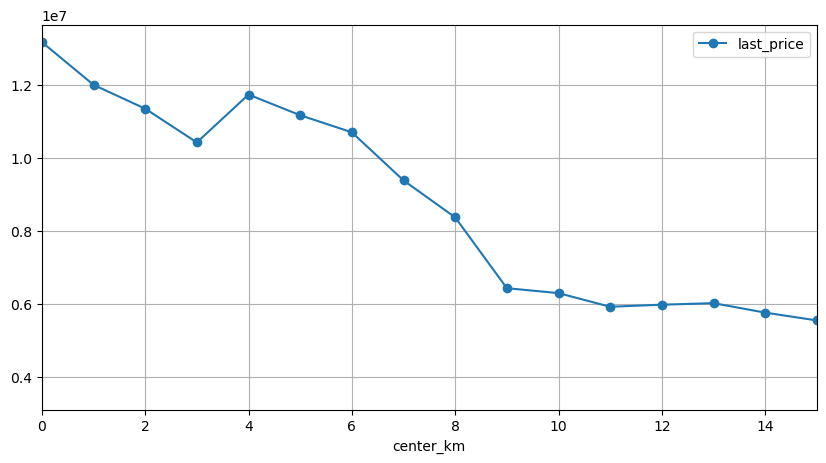

In [87]:
data.query('locality_name == "Санкт-Петербург"').pivot_table(index='center_km', values='last_price').plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
plt.show()

**Вывод:**
Самые дорогие расположены в 7 км. от центра города, далее цена за квартиры резко снижается.

### Общий вывод

**Общий вывод**
1. **Срок продажи квартиры**

Чаще всего квартиру продают за 92 дня. Если меньше 44 дней, то это достаточно быстро, если дольше 217 дней - это долго.
Есть достаточное число квартир, проданных всего за несколько дней после публикации.
Также есть варианты, которые продавались несколько десятков месяцев, скорее всего из-за высокой цены.

2. **Факторы, влияющие на стоимость.**

На стоимость влияет площадь квартиры. Также квартиры с просторной кухней более дорогие, нежели с маленькой. Число комнат особо не влияет на стоимость квартир.
Самые дешевые квартиры на первом этаже. Последний этаж также дешевле, чем остальные.

3. **Стоимость квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.**

Дороже всего квадратный метр в Санкт-Петербурге - 114848

Дешевле всего квадратный метр в Выборге - 58141

4. **Центр**

Самые дорогие квартиры в радиусе 7 км от центре города Спб.